In [2]:
import numpy as np
import matplotlib.pyplot as plt

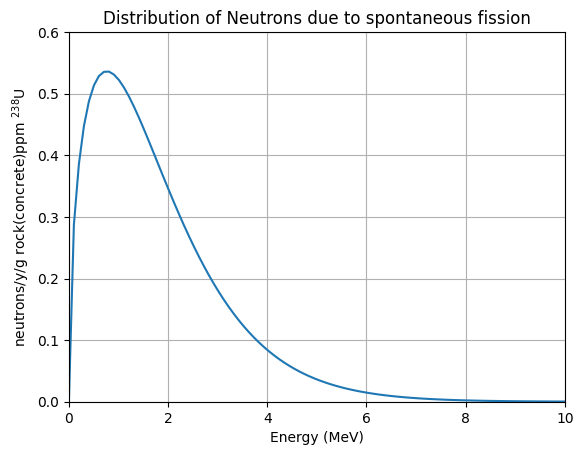

0.5358951308737832
0.13607922570793352


In [3]:
def disEventsFission(E):
    a = 0.7124 # MeV
    b = 5.6405 # MeV**-1
    C = 0.218 / (np.exp(-1/a) * np.sinh((b*1)**(1/2))) # MeV**-1
    y = C * np.exp(-E/a) * np.sinh((b*E)**(1/2) )
    return y

# Average number of neutrons emitted per fission event
R = 2.4 # +- 0.2

x = np.linspace(0, 10, 100)
y = disEventsFission(x) * R 
plt.plot(x, y)

plt.title('Distribution of Neutrons due to spontaneous fission')
plt.xlabel('Energy (MeV)')
plt.ylabel(r'neutrons/y/g rock(concrete)ppm $^{238}$U')
plt.xlim(0, 10)
plt.ylim(0, 0.6)
plt.grid()

plt.show()

print(np.max(y))
print(np.mean(y))


In [5]:
y_norm = y / np.sum(y) # Normalize the distribution 

data = np.column_stack((x, y_norm))
np.savetxt('ThermicNeutronsDistributions.txt', data, delimiter=' ', header="unit: MeV \nspectrum:", comments='')

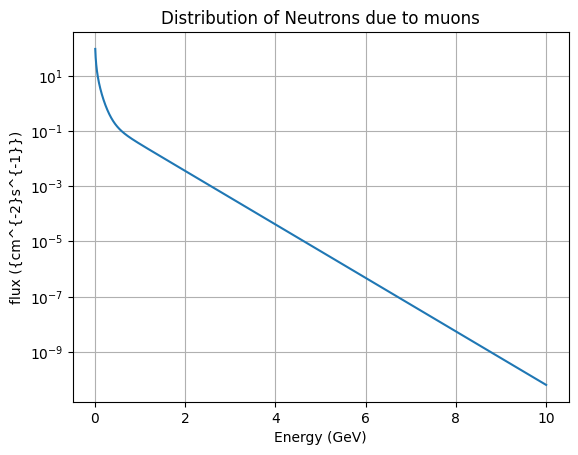

0.08261504678644335


In [ ]:
def disNeutronsMuonen(E):
    Eu = 270 # GeV
    a0 = 7.828
    a1 = 2.23
    a2 = -7.505 * 10**(-15)
    a3 = 2.831
    A = 1

    Bu = 0.324 - 0.641*np.exp(-0.014*Eu)

    y = A * (np.exp(-a0 * E)/E + Bu * np.exp(-a1*E)) + a2 * E**(-a3) 
    return y
    
x = np.linspace(0.01, 10, 100000)
y = disNeutronsMuonen(x)
plt.plot(x, y)

plt.title('Distribution of Neutrons due to muons')
plt.xlabel('Energy (GeV)')
plt.ylabel(r'flux ({cm^{-2}s^{-1}})')
plt.yscale('log')
#plt.xlim(0, 4)
#plt.ylim(0, 10**(-8))
plt.grid()

plt.show()

average_energy = np.trapezoid(x * y, x) / np.trapezoid(y, x)

print(average_energy)

#Rock stats used
# density = 2.65 g/cm^3
# A = 22
# Z = 11

In [44]:
data = np.column_stack((x, y))
np.savetxt('CosmicNeutronsDistributions.txt', data, delimiter=' ', header="unit: GeV \nspectrum:", comments='')

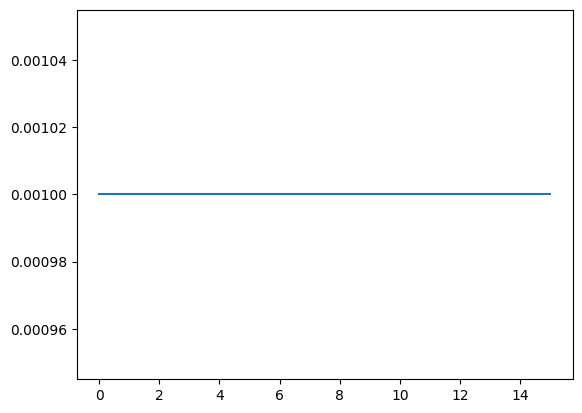

In [9]:
x = np.linspace(0.01, 15, 1000)
y = np.ones(1000)/1000
data = np.column_stack((x, y))

plt.plot(x, y)

np.savetxt('ConstantDistribution.txt', data, delimiter=' ', header="unit: MeV \nspectrum:", comments='')
